In [ ]:
What are Outliers?
An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. 
They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as outlier mining. 
There are many ways to detect the outliers, and the removal process is the data frame same as removing a data item from the panda’s data frame.

- Here pandas data frame is used for a more realistic approach as in real-world project need to detect the outliers arouse during the data analysis step, the same approach can be used on lists and series-type objects.

In [ ]:
Dataset:
Dataset used is Boston Housing dataset as it is preloaded in the sklearn library.

In [ ]:
# Importing
import sklearn
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
# Load the dataset
bos_hou = load_boston()
 
# Create the dataframe
column_name = bos_hou.feature_names
df_boston = pd.DataFrame(bos_hou.data)
df_boston.columns = column_name
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
Detecting the Outliers:
Outliers can be detected using visualization, implementing mathematical formulas on the dataset, or using the statistical approach. All of these are discussed below.

In [ ]:
Method 1: Visualization

Example 1: Using Box Plot.
It captures the summary of the data effectively and efficiently with only a simple box and whiskers. 
Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


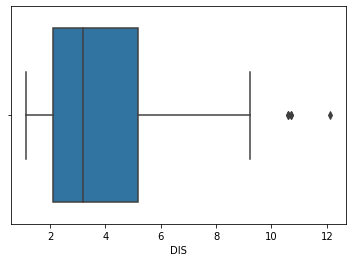

In [ ]:
# Box Plot
import seaborn as sns
sns.boxplot(df_boston['DIS'])

In [ ]:
In the above graph, can clearly see that values above 10 are acting as the outliers.

In [ ]:
# Position of the Outlier
print(np.where(df_boston['DIS']>10))

(array([351, 352, 353, 354, 355]),)


In [ ]:
Example 2: Using ScatterPlot.

It is used when you have paired numerical data, or when your dependent variable has multiple values for each reading independent variable, or when trying to determine the relationship between the two variables. 
In the process of utilizing the scatter plot, one can also use it for outlier detection.

To plot the scatter plot one requires two variables that are somehow related to each other. So here, 'Proportion of non-retail business acres per town' and 'Full-value property-tax rate per $10,000' are used whose column names are "INDUS" and "TAX" respectively.

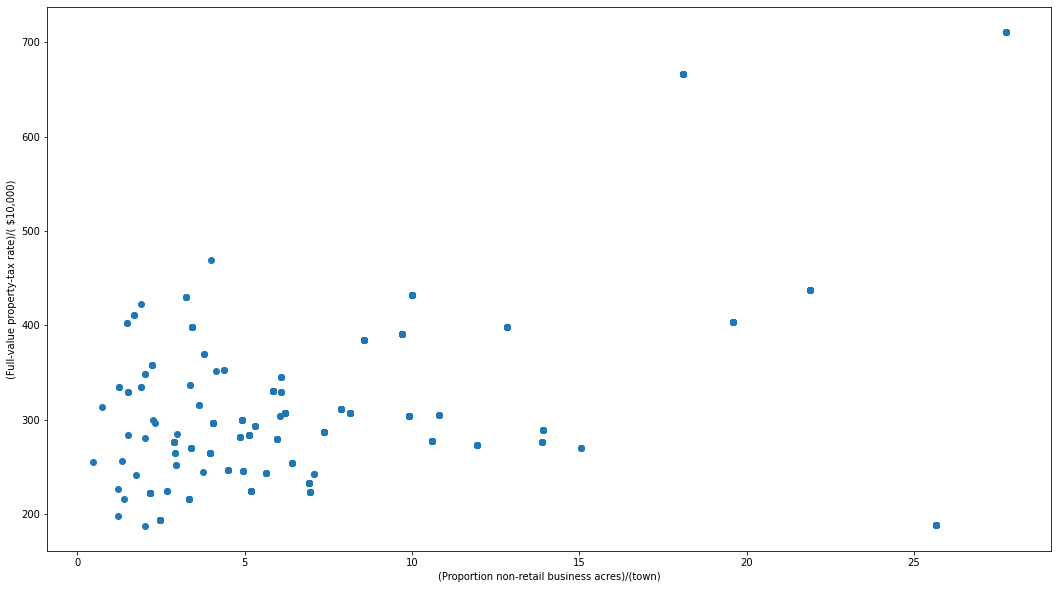

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df_boston['INDUS'], df_boston['TAX'])
 
# x-axis label
ax.set_xlabel('(Proportion non-retail business acres)/(town)')
 
# y-axis label
ax.set_ylabel('(Full-value property-tax rate)/( $10,000)')
plt.show()

In [ ]:
Looking at the graph can summarize that most of the data points are in the bottom left corner of the graph but there are few points that are exactly;y opposite that is the top right corner of the graph. 
Those points in the top right corner can be regarded as Outliers.

Using approximation can say all those data points that are x>20 and y>600 are outliers. 
The following code can fetch the exact position of all those points that satisfy these conditions.

In [ ]:
# Position of the Outlier
print(np.where((df_boston['INDUS']>20) & (df_boston['TAX']>600)))

(array([488, 489, 490, 491, 492]),)


In [ ]:
Method 2: Z-Score
Z- Score is also called a standard score. 
This value/score helps to understand that how far is the data point from the mean. 
And after setting up a threshold value one can utilize z score values of data points to define the outliers.

Zscore = (data_point -mean) / std. deviation

In [ ]:
# Z score
from scipy import stats
import numpy as np
 
z = np.abs(stats.zscore(df_boston['DIS']))
print(z)

[1.40213603e-01 5.57159875e-01 5.57159875e-01 1.07773662e+00
 1.07773662e+00 1.07773662e+00 8.39243922e-01 1.02463789e+00
 1.08719646e+00 1.32963473e+00 1.21297914e+00 1.15593484e+00
 7.87143464e-01 4.33754047e-01 3.17003386e-01 3.34449434e-01
 3.34449434e-01 2.20028082e-01 6.92761271e-04 6.92761271e-04
 1.35827806e-03 1.03277421e-01 8.64493539e-02 1.42685523e-01
 2.87387889e-01 3.13533191e-01 4.21632134e-01 3.12962749e-01
 3.13580728e-01 2.11043605e-01 2.08191390e-01 1.80619980e-01
 9.26766896e-02 3.72817172e-03 1.67532861e-02 2.06663257e-01
 1.98296760e-01 6.61510917e-02 2.48415135e-02 7.63470081e-01
 7.63470081e-01 9.15493132e-01 9.15493132e-01 9.15493132e-01
 9.15493132e-01 6.20526581e-01 6.20526581e-01 9.00519004e-01
 9.86370670e-01 1.08985853e+00 1.43545190e+00 1.43545190e+00
 1.43545190e+00 1.43545190e+00 1.67551331e+00 2.33004908e+00
 2.56345533e+00 2.15330683e+00 1.91086857e+00 1.49121270e+00
 1.63068600e+00 1.43725830e+00 1.63073354e+00 1.98982739e+00
 2.58023586e+00 1.338856

In [ ]:
The actual length of the list(z) is 506 that is the number of rows. 
It prints the z-score values of each data item of the column

Now to define an outlier threshold value is chosen which is generally 3.0. 
As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

In [ ]:
threshold = 3
 
# Position of the outlier
print(np.where(z > 3))

(array([351, 352, 353, 354, 355]),)


In [ ]:
Method 3: IQR (Inter Quartile Range)
IQR (Inter Quartile Range) Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field.

IQR = Quartile3 – Quartile1

In [ ]:
# IQR
Q1 = np.percentile(df_boston['DIS'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_boston['DIS'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

In [ ]:
To define the outlier base value is defined above and below datasets normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

upper = Q3 +1.5*IQR

lower = Q1 – 1.5*IQR

In the above formula as according to statistics, the 0.5 scale-up of IQR (new_IQR = IQR + 0.5*IQR) is taken, to consider all the data between 2.7 standard deviations in the Gaussian Distribution.

In [ ]:
# Above Upper bound
upper = df_boston['DIS'] >= (Q3+1.5*IQR)
 
print("Upper bound:",upper)
print(np.where(upper))
 
# Below Lower bound
lower = df_boston['DIS'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))

Upper bound: 0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: DIS, Length: 506, dtype: bool
(array([351, 352, 353, 354, 355]),)
Lower bound: 0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: DIS, Length: 506, dtype: bool
(array([], dtype=int64),)
